In [64]:
import numpy as np
import pandas as pd
import os
from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt

In [157]:
data_directory = "../Data/Study/"
hololenses = ['A/', 'B/']
subdirectory = "moving/error/recalibrated_calibration/"
#tasknames=['calibration']
tasknames = ['calibration', 'ssHeadConstrained', 'wsBodyConstrained', 'ssWalking', 'wsWalking', 'hallway']

In [158]:
def calculate_average_error():
    #allErrorsList=[]
    allAverageErrorsList=[]
    for taskname in tasknames:
        print(taskname)
        for hololens in hololenses:
            uncalibratedEuclidean = []
            calibratedEuclidean = []
            cosine = []
            print(hololens)
            participants = os.listdir(data_directory + hololens)
            for participant in participants:
                if not participant == '.DS_Store' and not participant == '51':
                    fileList = os.listdir(data_directory + hololens + participant + '/' + subdirectory)
                    fileList = sorted(fileList)
                    if '.DS_Store' in fileList:
                        fileList.remove('.DS_Store')
                    taskDataList = []
                    for i in range(len(fileList)):
                        file = fileList[i]
                        if file.startswith(taskname):
                            filePath = data_directory + hololens + participant + '/' + subdirectory + file
                            df = pd.read_csv(filePath)
                            uncalibratedEuclidean.append(df[['euclideanError']])
                            calibratedEuclidean.append(df[['recalibratedEuclideanError']])
                            cosine.append(df[['cosineError']])
                            if hololens == 'A/':
                                df['hololens'] = 'A'
                            elif hololens == 'B/':
                                df['hololens'] = 'B'
                            df['taskname'] = taskname
                            df['id'] = participant
                            taskDataList.append(df[['euclideanError', 'recalibratedEuclideanError', 'cosineError']])
                            #allErrorsList.append(df[['taskname', 'hololens', 'euclideanError', 'recalibratedEuclideanError', 'cosineError']])
                    #print(len(taskDataList))
                    task_df = pd.DataFrame().append(taskDataList)
                    d = {'id': [participant], 'taskname': [taskname], 'hololens': df.loc[0, 'hololens'], 'euclideanError': [task_df['euclideanError'].mean(axis=0)], 'recalibratedEuclideanError': [task_df['recalibratedEuclideanError'].mean(axis=0)], 'cosineError': [task_df['cosineError'].mean(axis=0)]}
                    allAverageErrorsList.append(pd.DataFrame(data = d))
            print(len(cosine))
            totalUncalibratedEuclidean = pd.DataFrame().append(uncalibratedEuclidean)
            totalCalibratedEuclidean = pd.DataFrame().append(calibratedEuclidean)
            totalCosine = pd.DataFrame().append(cosine)
            # print("Uncalibrated euclidean: " + str(totalUncalibratedEuclidean['euclideanError'].mean()))
            # print("Calibrated euclidean: " + str(totalCalibratedEuclidean['recalibratedEuclideanError'].mean()))
            # print("Cosine: " + str(totalCosine['cosineError'].mean()))
    #allErrors = pd.DataFrame().append(allErrorsList)
    recalibration = subdirectory.split('/')[-2]
    #allErrors.to_csv('../' + recalibration + '_error.csv', index=False)
    averageErrors = pd.DataFrame().append(allAverageErrorsList)
    averageErrors.to_csv('../Data/moving_' + recalibration + '_average_error.csv', index=False)
        #return [totalUncalibratedEuclidean['euclideanError'].mean(), totalCalibratedEuclidean['recalibratedEuclideanError'].mean(), totalCosine['cosineError'].mean()]


In [159]:
#taskname = "calibration_"
errors = calculate_average_error()
#print("Uncalibrated euclidean: " + str(errors[0]))
#print("Calibrated euclidean: " + str(errors[1]))
#print("Cosine: " + str(errors[2]))

calibration
A/
50
B/
50
ssHeadConstrained
A/
50
B/
50
wsBodyConstrained
A/
50
B/
50
ssWalking
A/
50
B/
50
wsWalking
A/
50
B/
50
hallway
A/
50
B/
50


In [46]:
#linearity
horizontal = []
vertical = []
for hololens in hololenses:
    participantsList = os.listdir(data_directory + hololens)
    for participant in participantsList:
        if not participant == '.DS_Store':
            fileList = os.listdir(data_directory + hololens + participant + '/recalibrated_calibration/')
            for file in fileList:
                if not file == '.DS_Store':
                    df = pd.read_csv(data_directory + hololens + participant + '/recalibrated_calibration/' + file)
                    horizontal.append(df[['TargetAngleX', 'GazeAngleX', 'CalibratedGazeAngleX']])
                    vertical.append(df[['TargetAngleY', 'GazeAngleY', 'CalibratedGazeAngleY']])
totalHorizontal = pd.DataFrame().append(horizontal)
totalVertical = pd.DataFrame().append(vertical)

In [58]:
x = np.array(totalHorizontal['TargetAngleX'])
y = np.array(totalHorizontal['GazeAngleX'])
a, b = np.polyfit(x, y, 1)
print(a)
print(b)

0.7127848972190873
-0.6405065620001829


In [60]:
x = np.array(totalVertical['TargetAngleY'])
y = np.array(totalVertical['GazeAngleY'])
a, b = np.polyfit(x, y, 1)
print(a)
print(b)

0.7113289244195989
-3.945114683853654


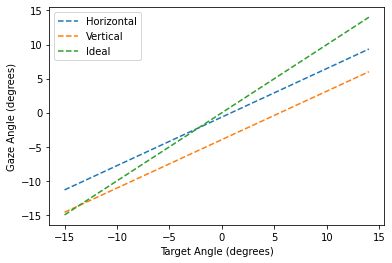

In [69]:
x = np.arange(-15, 15, 1)
horz = -0.64 + 0.7127 * x
vert = -3.945 + 0.711 * x
plt.plot(x, horz, '--', label='Horizontal')
plt.plot(x, vert, '--', label="Vertical")
plt.plot(x, x, '--', label='Ideal')
plt.xlabel('Target Angle (degrees)')
plt.ylabel('Gaze Angle (degrees)')
plt.legend()
plt.show()

      TargetAngleX  GazeAngleX  CalibratedGazeAngleX
0    -7.597203e-07    2.100687             -1.930936
1     3.798601e-07    2.100083             -1.930756
2    -2.848951e-06    2.098309             -1.931601
3     0.000000e+00    2.095988             -1.933005
4    -3.418741e-06    2.095017             -1.933299
...            ...         ...                   ...
3945 -3.987713e+00  -40.893030            -42.600106
3946 -4.162546e+00  -41.045530            -42.755297
3947 -4.324427e+00  -41.195060            -42.906425
3948 -4.389066e+00  -41.342760            -43.054740
3949 -4.389119e+00  -41.487730            -43.199388

[2427861 rows x 3 columns]


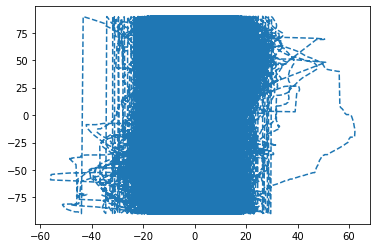

In [75]:
copy = totalHorizontal.copy()
copy.sort_values(by=['TargetAngleX'])
print(copy)
plt.plot(copy['TargetAngleX'], copy['GazeAngleX'], '--')